## Task-D: Collinear features and their effect on linear models

In [105]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

# Task 1: Logistic Regression

### 1. Performing correlation between the features

In [79]:
feats = pd.DataFrame(X,columns=["x","y","z","x*x","2*y","2*z+3*x*x","w"])
target = pd.DataFrame(Y,columns=["target"])
feats.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054


In [18]:
feats.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


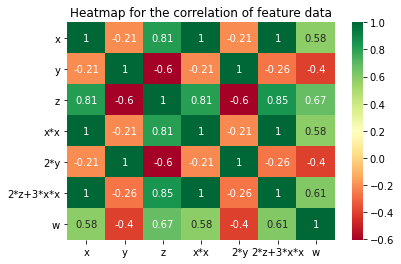

In [20]:
# plotting heatmap for more visualization
sns.heatmap(feats.corr(),annot=True,cmap="RdYlGn")
plt.title("Heatmap for the correlation of feature data")
plt.show()

### 2.  Finding the best model for the given data

In [46]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(),tuned_parameters,cv=5,scoring="accuracy",return_train_score=True)
# when using Grid search CV no need to seperate the data into cv data, it will do internally
model.fit(feats,target)
best_C = model.best_estimator_
best_C
# As data is very small, getting a straight line when plotting hyper paramter tuning graph
# So taking default method available in attributes of logistic regression for chossing best C

LogisticRegression(C=0.0001)

SGDClassifier(alpha=0.01, loss='log', random_state=15)
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003470  1.287172e-03         0.001658        0.000203      0.0001   
1       0.002044  2.364137e-04         0.001112        0.000136        0.01   
2       0.001505  8.781272e-05         0.000864        0.000097           1   
3       0.001232  2.775282e-05         0.000700        0.000021         100   
4       0.001194  8.035803e-07         0.000684        0.000003       10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}                1.0                1.0                1.0   
1    {'alpha': 0.01}                1.0                1.0                1.0   
2       {'alpha': 1}                1.0                1.0                1.0   
3     {'alpha': 100}                0.5                0.5                0.5   
4   {'alpha': 10000}                0.5                0.5       

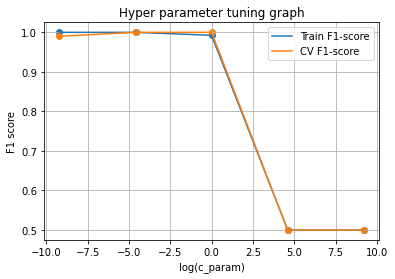

In [118]:
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(SGDClassifier(loss='log',tol=0.001,random_state=15),tuned_parameters,cv=5,scoring="accuracy",return_train_score=True)
model.fit(feats,target)
print(model.best_estimator_)
#print(model.score(X_test, y_test))
#print(X_train.shape)

res = pd.DataFrame.from_dict(model.cv_results_)
print(res)
train_res = res["mean_train_score"]
cv_res = res["mean_test_score"]
c_params = np.log(list(res["param_alpha"]))

plt.title("Hyper parameter tuning graph")
plt.plot(c_params,train_res,label='Train F1-score')
plt.plot(c_params,cv_res,label='CV F1-score')
plt.scatter(c_params,train_res)
plt.scatter(c_params,cv_res)
plt.xlabel("log(c_param)")
plt.ylabel("F1 score")
plt.grid()
plt.legend()
plt.show()

### 3. Getting the weights with the original data

In [77]:
best_model = LogisticRegression(C=10**-4)
best_model.fit(feats,target)
accuracy_score= (best_model.score(feats,target))
print("accuracy_score with best model: ",accuracy_score)
# Accuracy score is 1.0 because there is nor train error at all and all points are correctly classified
w = best_model.coef_
print("weight Vector with best model: ",w)

accuracy_score with best model:  1.0
weight Vector with best model:  [[ 0.0035963  -0.00341973  0.00479983  0.00355269 -0.00341973  0.00377695
   0.00316971]]


### 4. Modifying original data

In [81]:
# As per the class lecture, random noise should be normal distrubution with mean=0 and variance=0.01
X_new = feats + np.random.normal(0,0.01,feats.shape)
best_model.fit(X_new,target)

LogisticRegression(C=0.0001)

In [85]:
best_model_accuracy_edited = best_model.score(X_new,target)
print("accuracy_score with best model: ",best_model_accuracy_edited)
w_new = best_model.coef_
print("weight Vector with best model: ",w_new)
# Here the weight vector changed slightly changed but the accuracy still remains unchanged as 
# still the plane seperating the data correctly

accuracy_score with best model:  1.0
weight Vector with best model:  [[ 0.00358991 -0.00341494  0.00480075  0.00354858 -0.00342267  0.00378052
   0.00316488]]


### 5.  Checking deviations in metric and weights 

In [101]:
acc_diff = accuracy_score - best_model_accuracy_edited
print("Difference in Accuracies:",acc_diff)
weights_diff = abs(w[0] - w_new[0])
print("Difference in weights:",weights_diff)
## descending order of feature indexes having high difference
sorted_weights_idx = np.argsort(weights_diff)[::-1] 
print("Features that differed more on adding noise:",list(feats.columns[sorted_weights_idx[0:5]]))

Difference in Accuracies: 0.0
Difference in weights: [6.39510474e-06 4.79105003e-06 9.16518041e-07 4.10621398e-06
 2.94038102e-06 3.57375251e-06 4.82442727e-06]
Features that differed more on adding noise: ['x', 'w', 'y', 'x*x', '2*z+3*x*x']


# Task 2: Linear SVM

### 1.  Finding the best model for the given data

In [106]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LinearSVC(),tuned_parameters,cv=5,scoring="accuracy",return_train_score=True)
# when using Grid search CV no need to seperate the data into cv data, it will do internally
model.fit(feats,target)
best_C = model.best_estimator_
best_C
# As data is very small, getting a straight line when plotting hyper paramter tuning graph
# So taking default method available in attributes of logistic regression for chossing best C

LinearSVC(C=0.0001)

### 2. Getting the weights with the original data

In [107]:
best_model = LinearSVC(C=10**-4, loss='hinge')
best_model.fit(feats,target)
accuracy_score= (best_model.score(feats,target))
print("accuracy_score with best model: ",accuracy_score)
# Accuracy score is 1.0 because there is no train error at all and all points are correctly classified
w = best_model.coef_
print("weight Vector with best model: ",w)

accuracy_score with best model:  1.0
weight Vector with best model:  [[ 0.0072829  -0.00690684  0.0096999   0.0071957  -0.00690684  0.00764729
   0.0064175 ]]


### 3. Modifying original data

In [108]:
# As per the class lecture, random noise should be normal distrubution with mean=0 and variance=0.01
X_new = feats + np.random.normal(0,0.01,feats.shape)
best_model.fit(X_new,target)

LinearSVC(C=0.0001, loss='hinge')

In [109]:
best_model_accuracy_edited = best_model.score(X_new,target)
print("accuracy_score with best model: ",best_model_accuracy_edited)
w_new = best_model.coef_
print("weight Vector with best model: ",w_new)
# Here the weight vector changed slightly changed but the accuracy still remains unchanged as 
# still the plane seperating the data correctly

accuracy_score with best model:  1.0
weight Vector with best model:  [[ 0.0072654  -0.00690734  0.00969648  0.00717407 -0.00690401  0.00766006
   0.00643031]]


### 5.  Checking deviations in metric and weights 

In [110]:
acc_diff = accuracy_score - best_model_accuracy_edited
print("Difference in Accuracies:",acc_diff)
weights_diff = abs(w[0] - w_new[0])
print("Difference in weights:",weights_diff)
## descending order of feature indexes having high difference
sorted_weights_idx = np.argsort(weights_diff)[::-1] 
print("Features that differed more on adding noise:",list(feats.columns[sorted_weights_idx[0:5]]))

Difference in Accuracies: 0.0
Difference in weights: [1.74990570e-05 4.95252750e-07 3.42456761e-06 2.16272660e-05
 2.83036703e-06 1.27752611e-05 1.28056621e-05]
Features that differed more on adding noise: ['x*x', 'x', 'w', '2*z+3*x*x', 'z']


**Observations:**
*1. In logistic Regression, the feature differed more is having feature "y" where as in SVM it does not impact much
*2. 